In [1]:
# Import libraries
import numpy as np
import pandas as pd
import prettyplots as vs
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

## Changing options to display all data

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [2]:
# Read CDC Birth precessed data
data = pd.read_csv('data2014.csv')
print "CDC Birth data read successfully!"

/Users/sabrinaaliyeva/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CDC Birth data read successfully!


In [3]:
data.head()

,Unnamed: 0,bfacil3,mager9,mbstate_rec,mrace15,mhisp_r,mar_p,dmar,meduc,fagerec11,frace15,fhisp_r,feduc,priorlive,priordead,priorterm,lbo_rec,tbo_rec,illb_r11,ilop_r11,ilp_r11,precare5,previs_rec,wic,cig0_r,cig1_r,cig2_r,cig3_r,cig_rec,m_ht_in,bmi_r,pwgt_r,dwgt_r,wtgain_rec,rf_pdiab,rf_gdiab,rf_phype,rf_ghype,rf_ehype,rf_ppterm,rf_inftr,rf_fedrg,rf_artec,f_rf_inft,rf_cesar,rf_cesarn,no_risks,ip_gon,ip_syph,ip_chlam,ip_hepatb,ip_hepatc,no_infec,ob_ecvs,ob_ecvf,ld_indl,ld_augm,ld_ster,ld_antb,ld_chor,ld_anes,no_lbrdlv,me_pres,me_trial,dmeth_rec,f_mm_,no_mmorb,attend,pay_rec,f_pay,dplural,sex,gestrec10,oegest_r10,ca_anen,ca_mnsb,ca_cchd,ca_cdh,ca_omph,ca_gast,ca_limb,ca_cleft,ca_clpal,ca_downs,ca_disor,ca_hypo,f_ca_cleft,f_ca_hypos,no_congen,ubfacil,urf_diab,urf_chyper,urf_phyper,urf_eclam,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs
0,0,1,4,1,1.0,0,X,1,7.0,6,1.0,0,4,1,0,0,2,2,4.0,88.0,4.0,1.0,6,N,0.0,0.0,0.0,0.0,N,99.0,9.0,999.0,213.0,9,N,N,N,Y,N,N,N,X,X,1,N,0.0,0.0,N,N,N,N,N,1.0,N,N,Y,N,N,N,N,N,0.0,1.0,X,1,1,1.0,1,4.0,1,1,F,7,7,N,N,N,N,N,N,N,N,N,N,N,N,1,1,1.0,1,2,2,1,2,1,2,2,2,2,2,2,2
1,1,1,4,1,3.0,0,N,2,3.0,11,99.0,9,9,2,0,0,3,3,5.0,88.0,5.0,3.0,5,N,1.0,1.0,0.0,0.0,Y,64.0,4.0,180.0,170.0,1,N,N,N,N,N,Y,N,X,X,1,N,0.0,0.0,N,N,N,N,N,1.0,N,N,Y,N,N,N,N,N,0.0,1.0,X,1,1,1.0,3,1.0,1,1,F,6,6,N,N,N,N,N,N,N,N,N,N,N,N,1,1,1.0,1,2,2,2,2,1,2,2,2,2,2,2,2
2,2,1,3,1,1.0,0,X,1,4.0,3,1.0,0,3,0,0,2,1,3,88.0,2.0,2.0,1.0,7,Y,2.0,0.0,0.0,0.0,N,66.0,5.0,230.0,230.0,1,N,N,N,N,N,N,N,X,X,1,N,0.0,1.0,N,N,N,N,N,1.0,N,N,Y,N,N,N,N,N,0.0,1.0,X,1,1,1.0,1,4.0,1,1,F,7,7,N,N,N,N,N,N,N,N,N,N,N,N,1,1,1.0,1,2,2,2,2,1,2,2,2,2,2,2,2
3,3,1,3,1,2.0,0,N,2,5.0,11,99.0,9,9,0,0,1,1,2,88.0,8.0,8.0,1.0,6,Y,0.0,0.0,0.0,0.0,N,59.0,3.0,130.0,155.0,3,N,N,N,N,N,N,N,X,X,1,N,0.0,1.0,N,N,N,N,N,1.0,N,N,Y,N,N,N,Y,Y,0.0,1.0,Y,2,1,1.0,1,4.0,1,1,M,8,8,N,N,N,N,N,N,N,N,N,N,N,N,1,1,1.0,1,2,2,2,2,1,2,2,2,2,2,2,2
4,4,1,4,1,1.0,0,X,1,5.0,4,1.0,0,4,2,0,0,3,3,5.0,88.0,5.0,1.0,6,Y,0.0,0.0,0.0,0.0,N,62.0,3.0,159.0,158.0,1,N,N,N,N,N,N,N,X,X,1,N,0.0,1.0,N,N,N,N,N,1.0,N,N,N,N,N,N,N,N,1.0,1.0,X,1,1,1.0,1,4.0,1,1,F,9,9,N,N,N,N,N,N,N,N,N,N,N,N,1,1,1.0,1,2,2,2,2,2,2,2,2,2,2,2,2


In [4]:
data.shape

(3994520, 102)

In [5]:
# Drop first unnamed column
data=data.drop(data.columns[[0]], axis=1)

In [8]:
# Display a description of the dataset
data.describe()

,bfacil3,mager9,mbstate_rec,mrace15,mhisp_r,dmar,meduc,fagerec11,frace15,fhisp_r,priorlive,priordead,priorterm,lbo_rec,tbo_rec,illb_r11,ilop_r11,ilp_r11,precare5,previs_rec,cig0_r,cig1_r,cig2_r,cig3_r,m_ht_in,bmi_r,pwgt_r,dwgt_r,wtgain_rec,f_rf_inft,rf_cesarn,no_risks,no_infec,no_lbrdlv,me_pres,dmeth_rec,f_mm_,no_mmorb,attend,pay_rec,f_pay,dplural,gestrec10,oegest_r10,f_ca_cleft,f_ca_hypos,no_congen,ubfacil,urf_diab,urf_chyper,urf_phyper,urf_eclam,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs
count,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06,3.994520e+06
mean,1.015176e+00,4.269552e+00,1.225399e+00,2.302737e+00,5.700617e-01,1.402161e+00,4.453971e+00,5.613883e+00,1.994902e+01,1.656804e+00,1.402994e+00,4.714118e-01,1.713781e+00,2.141257e+00,2.577652e+00,4.298078e+01,7.641861e+01,4.503043e+01,4.914646e+00,6.915620e+00,5.533776e-01,4.789314e-01,4.480841e-01,4.366432e-01,6.596256e+01,3.309187e+00,2.113055e+02,2.345425e+02,3.589758e+00,9.190421e-01,3.921046e+00,1.021091e+00,1.287334e+00,4.970983e-01,1.532157e+00,1.322417e+00,9.244976e-01,1.287960e+00,1.287985e+00,2.017400e+00,5.780569e-01,1.036290e+00,7.063851e+00,6.929720e+00,9.601036e-01,9.601036e-01,1.301149e+00,1.036387e+00,1.948765e+00,1.995487e+00,1.960631e+00,2.008808e+00,1.774482e+00,2.098735e+00,2.019154e+00,2.019125e+00,2.018890e+00,2.018540e+00,2.019139e+00,2.018768e+00
std,1.225105e-01,1.212414e+00,4.236222e-01,3.437270e+00,1.403343e+00,4.903341e-01,1.967181e+00,2.411795e+00,3.741894e+01,3.118160e+00,5.581614e+00,6.702698e+00,1.134676e+01,1.345502e+00,1.743090e+00,4.231444e+01,3.119562e+01,4.366242e+01,1.807725e+01,2.049630e+00,1.496000e+00,1.444139e+00,1.423069e+00,1.415098e+00,8.171808e+00,1.950355e+00,2.130187e+02,1.968848e+02,1.668746e+00,2.727705e-01,1.880236e+01,1.625687e+00,1.561021e+00,1.693642e+00,1.871953e+00,4.674016e-01,2.642004e-01,1.534822e+00,7.271749e-01,1.670607e+00,4.938696e-01,1.939372e-01,2.809669e+00,2.690572e+00,1.957159e-01,1.957159e-01,1.532814e+00,3.191286e-01,3.724771e-01,3.076066e-01,3.576993e-01,2.850326e-01,4.761293e-01,1.061643e+00,3.668686e-01,3.669090e-01,3.672410e-01,3.677353e-01,3.668898e-01,3.674139e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,1.000000e+00,7.500000e+01,1.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,8.800000e+01,4.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.200000e+

In [9]:
# Calculate number of patients
n_patients = data.shape[0]

# Calculate number of features
n_features = data.shape[1] - 1

# Calculate number of Vaginal deliveries
V_del = data.loc[data['dmeth_rec'] == 1]
n_V_del= V_del.shape[0]

# Calculate number of C-section deliveries
C_del = data.loc[data['dmeth_rec'] == 2]
n_C_del= C_del.shape[0]

# Calculate C-section delivey rate
C_del_rate = float ( n_C_del ) / n_patients * 100

# Print the results
print "Total number of patients: {}".format(n_patients)
print "Number of features: {}".format(n_features)
print "Number of patients who had Vaginal delivery: {}".format(n_V_del)
print "Number of patients who had C-Section: {}".format(n_C_del)
print "C-Section delivery rate: {:.2f}%".format(C_del_rate)

Total number of patients: 3994520
Number of features: 100
Number of patients who had Vaginal delivery: 2706620
Number of patients who had C-Section: 1287900
C-Section delivery rate: 32.24%


In [10]:
# Drop rows where there was no attempt in labor and then drop that column
data_no_trial= data.drop(data[data.me_trial == 'N'].index)
df=data_no_trial.drop('me_trial', axis=1)
df.shape

(3087737, 100)

In [13]:
df.dmeth_rec.value_counts()

1    2706620
2     381117
Name: dmeth_rec, dtype: int64

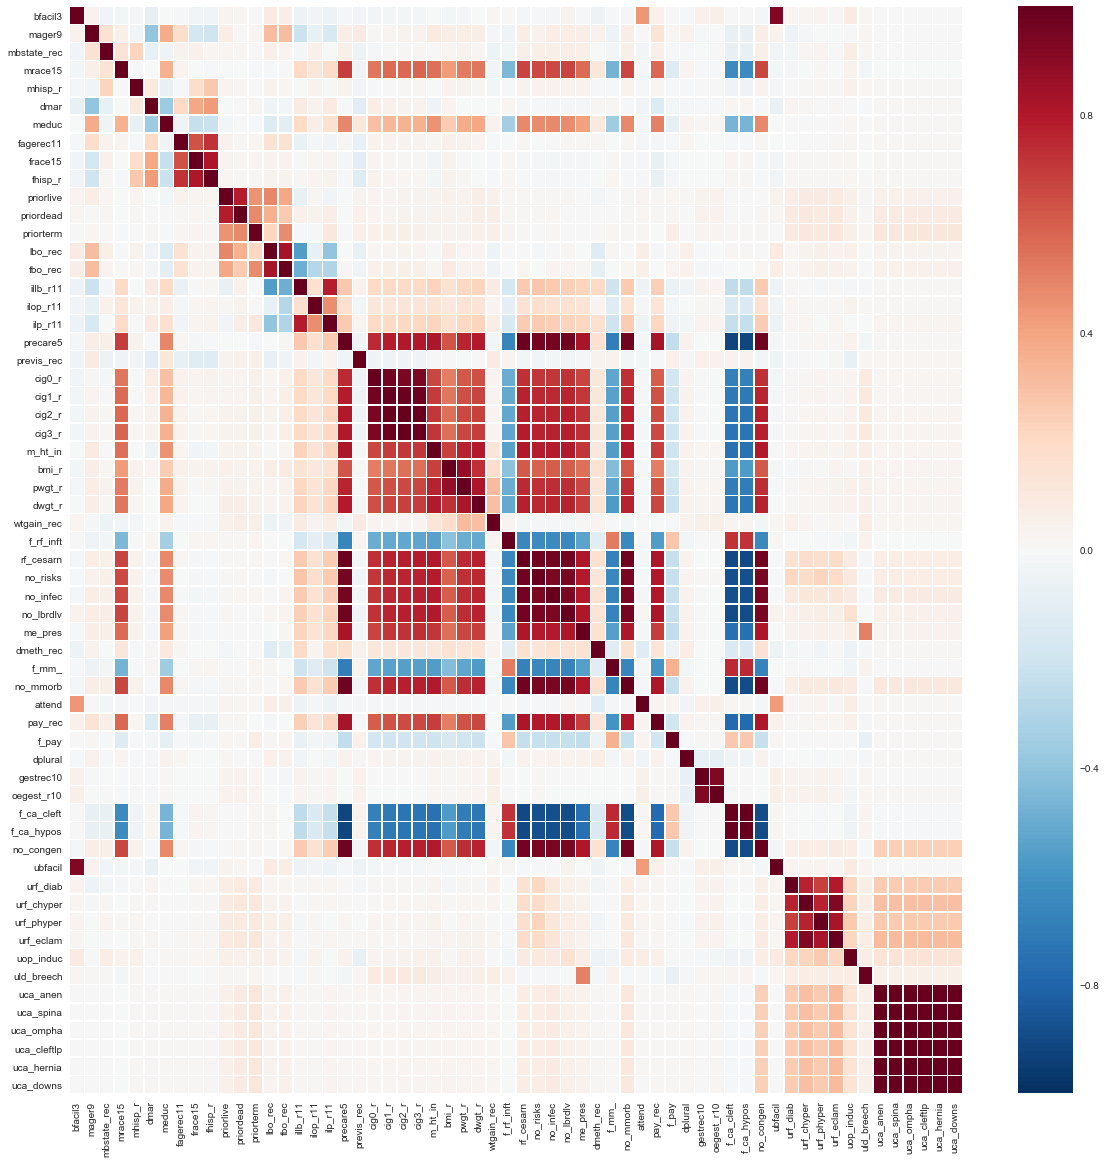

In [24]:
import seaborn as sns
from matplotlib import pyplot

pyplot.figure(figsize=(20, 20))
sns.heatmap(df.corr(),linewidths=.5)

In [15]:
# Extract feature columns
X_all = df.drop('dmeth_rec', axis = 1)

# Extract target column of delivery method
y_all = df['dmeth_rec'] 


In [17]:
X_all = pd.get_dummies(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (199 total features):
['bfacil3', 'mager9', 'mbstate_rec', 'mrace15', 'mhisp_r', 'dmar', 'meduc', 'fagerec11', 'frace15', 'fhisp_r', 'priorlive', 'priordead', 'priorterm', 'lbo_rec', 'tbo_rec', 'illb_r11', 'ilop_r11', 'ilp_r11', 'precare5', 'previs_rec', 'cig0_r', 'cig1_r', 'cig2_r', 'cig3_r', 'm_ht_in', 'bmi_r', 'pwgt_r', 'dwgt_r', 'wtgain_rec', 'f_rf_inft', 'rf_cesarn', 'no_risks', 'no_infec', 'no_lbrdlv', 'me_pres', 'f_mm_', 'no_mmorb', 'attend', 'pay_rec', 'f_pay', 'dplural', 'gestrec10', 'oegest_r10', 'f_ca_cleft', 'f_ca_hypos', 'no_congen', 'ubfacil', 'urf_diab', 'urf_chyper', 'urf_phyper', 'urf_eclam', 'uop_induc', 'uld_breech', 'uca_anen', 'uca_spina', 'uca_ompha', 'uca_cleftlp', 'uca_hernia', 'uca_downs', 'mar_p_N', 'mar_p_U', 'mar_p_X', 'mar_p_Y', 'feduc_1.0', 'feduc_2.0', 'feduc_3.0', 'feduc_4.0', 'feduc_5.0', 'feduc_6.0', 'feduc_7.0', 'feduc_8.0', 'feduc_9.0', 'feduc_1.0', 'feduc_2.0', 'feduc_3.0', 'feduc_4.0', 'feduc_5.0', 'feduc_6.0', 'feduc_7.0'

In [18]:
# Undersampling the data due to imbalance of the data
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X_all, y_all)
print('Original dataset shape {}'.format(Counter(y_all)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 2706620, 2: 381117})
Resampled dataset shape Counter({1: 381117, 2: 381117})


In [19]:
float(381117)/2706620

0.14080920114386208

In [20]:
# Add preprocced data back together (y into X_all)
data_res=pd.DataFrame(X_res, columns=list(X_all.columns))
data_res2=pd.DataFrame({'dmeth_rec': y_res})
data_res=pd.concat([data_res, data_res2], axis=1)
data_res.head()


,bfacil3,mager9,mbstate_rec,mrace15,mhisp_r,dmar,meduc,fagerec11,frace15,fhisp_r,priorlive,priordead,priorterm,lbo_rec,tbo_rec,illb_r11,ilop_r11,ilp_r11,precare5,previs_rec,cig0_r,cig1_r,cig2_r,cig3_r,m_ht_in,bmi_r,pwgt_r,dwgt_r,wtgain_rec,f_rf_inft,rf_cesarn,no_risks,no_infec,no_lbrdlv,me_pres,f_mm_,no_mmorb,attend,pay_rec,f_pay,dplural,gestrec10,oegest_r10,f_ca_cleft,f_ca_hypos,no_congen,ubfacil,urf_diab,urf_chyper,urf_phyper,urf_eclam,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs,mar_p_N,mar_p_U,mar_p_X,mar_p_Y,feduc_1.0,feduc_2.0,feduc_3.0,feduc_4.0,feduc_5.0,feduc_6.0,feduc_7.0,feduc_8.0,feduc_9.0,feduc_1.0,feduc_2.0,feduc_3.0,feduc_4.0,feduc_5.0,feduc_6.0,feduc_7.0,feduc_8.0,feduc_9.0,feduc_U,wic_N,wic_U,wic_Y,cig_rec_N,cig_rec_U,cig_rec_Y,rf_pdiab_N,rf_pdiab_U,rf_pdiab_Y,rf_gdiab_N,rf_gdiab_U,rf_gdiab_Y,rf_phype_N,rf_phype_U,rf_phype_Y,rf_ghype_N,rf_ghype_U,rf_ghype_Y,rf_ehype_N,rf_ehype_U,rf_ehype_Y,rf_ppterm_N,rf_ppterm_U,rf_ppterm_Y,rf_inftr_N,rf_inftr_U,rf_inftr_Y,rf_fedrg_N,rf_fedrg_U,rf_fedrg_X,rf_fedrg_Y,rf_artec_N,rf_artec_U,rf_artec_X,rf_artec_Y,rf_cesar_N,rf_cesar_U,rf_cesar_Y,ip_gon_N,ip_gon_U,ip_gon_Y,ip_syph_N,ip_syph_U,ip_syph_Y,ip_chlam_N,ip_chlam_U,ip_chlam_Y,ip_hepatb_N,ip_hepatb_U,ip_hepatb_Y,ip_hepatc_N,ip_hepatc_U,ip_hepatc_Y,ob_ecvs_N,ob_ecvs_U,ob_ecvs_Y,ob_ecvf_N,ob_ecvf_U,ob_ecvf_Y,ld_indl_N,ld_indl_U,ld_indl_Y,ld_augm_N,ld_augm_U,ld_augm_Y,ld_ster_N,ld_ster_U,ld_ster_Y,ld_antb_N,ld_antb_U,ld_antb_Y,ld_chor_N,ld_chor_U,ld_chor_Y,ld_anes_N,ld_anes_U,ld_anes_Y,sex_F,sex_M,ca_anen_N,ca_anen_U,ca_anen_Y,ca_mnsb_N,ca_mnsb_U,ca_mnsb_Y,ca_cchd_N,ca_cchd_U,ca_cchd_Y,ca_cdh_N,ca_cdh_U,ca_cdh_Y,ca_omph_N,ca_omph_U,ca_omph_Y,ca_gast_N,ca_gast_U,ca_gast_Y,ca_limb_N,ca_limb_U,ca_limb_Y,ca_cleft_N,ca_cleft_U,ca_cleft_Y,ca_clpal_N,ca_clpal_U,ca_clpal_Y,ca_downs_C,ca_downs_N,ca_downs_P,ca_downs_U,ca_disor_C,ca_disor_N,ca_disor_P,ca_disor_U,ca_hypo_N,ca_hypo_U,ca_hypo_Y,dmeth_rec
0,1.0,3.0,1.0,2.0,0.0,2.0,5.0,11.0,99.0,9.0,0.0,0.0,1.0,1.0,2.0,88.0,8.0,8.0,1.0,6.0,0.0,0.0,0.0,0.0,59.0,3.0,130.0,155.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,8.0,8.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,1.0,3.0,1.0,2.0,0.0,1.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,88.0,88.0,88.0,2.0,5.0,0.0,0.0,0.0,0.0,69.0,4.0,206.0,260.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,6.0,6.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,1.0,6.0,1.0,1.0,0.0,1.0,4.0,7.0,1.0,0.0,2.0,0.0,1.0,3.0,4.0,4.0,8.0,4.0,1.0,9.0,0.0,0.0,0.0,0.0,67.0,5.0,250.0,297.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,8.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.

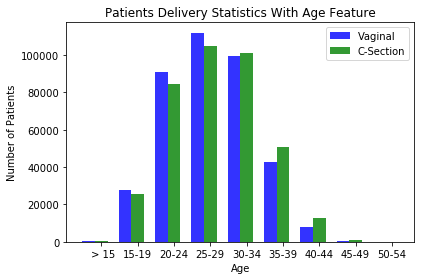

In [15]:
Age_df_V=data_res.drop(data_res[data_res.dmeth_rec == 2].index)
Age_V=list(Age_df_V['mager9']) 

age_v_1=Age_V.count(1)
age_v_2=Age_V.count(2)
age_v_3=Age_V.count(3)
age_v_4=Age_V.count(4)
age_v_5=Age_V.count(5)
age_v_6=Age_V.count(6)
age_v_7=Age_V.count(7)
age_v_8=Age_V.count(8)
age_v_9=Age_V.count(9)


Age_df_CS=data_res.drop(data_res[data_res.dmeth_rec == 1].index)
Age_CS=list(Age_df_CS['mager9'])

age_cs_1=Age_CS.count(1)
age_cs_2=Age_CS.count(2)
age_cs_3=Age_CS.count(3)
age_cs_4=Age_CS.count(4)
age_cs_5=Age_CS.count(5)
age_cs_6=Age_CS.count(6)
age_cs_7=Age_CS.count(7)
age_cs_8=Age_CS.count(8)
age_cs_9=Age_CS.count(9)
 
# data to plot
n_groups = 9
vag = (age_v_1, age_v_2, age_v_3, age_v_4, age_v_5, age_v_6, age_v_7, age_v_8, age_v_9)
cs = (age_cs_1, age_cs_2, age_cs_3, age_cs_4, age_cs_5, age_cs_6, age_cs_7, age_cs_8, age_cs_9)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, vag, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Vaginal')
 
rects2 = plt.bar(index + bar_width, cs, bar_width,
                 alpha=opacity,
                 color='g',
                 label='C-Section')
 
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Patients Delivery Statistics With Age Feature')
plt.xticks(index + bar_width, (' > 15', '15-19', '20-24', '25-29', '30-34', '35-39',
                               '40-44', '45-49', '50-54'))
plt.legend()
 
plt.tight_layout()
plt.show()

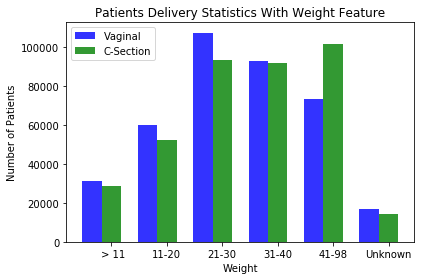

In [16]:
Weight_df_V=data_res.drop(data_res[data_res.dmeth_rec == 2].index)
Weight_V=list(Weight_df_V['wtgain_rec']) 

w_v_1=Weight_V.count(1)
w_v_2=Weight_V.count(2)
w_v_3=Weight_V.count(3)
w_v_4=Weight_V.count(4)
w_v_5=Weight_V.count(5)
w_v_9=Weight_V.count(9)


Weight_df_CS=data_res.drop(data_res[data_res.dmeth_rec == 1].index)
Weight_CS=list(Weight_df_CS['wtgain_rec'])

w_cs_1=Weight_CS.count(1)
w_cs_2=Weight_CS.count(2)
w_cs_3=Weight_CS.count(3)
w_cs_4=Weight_CS.count(4)
w_cs_5=Weight_CS.count(5)
w_cs_9=Weight_CS.count(9)


 
# data to plot
n_groups = 6
vag = (w_v_1, w_v_2, w_v_3, w_v_4, w_v_5, w_v_9)
cs = (w_cs_1, w_cs_2, w_cs_3, w_cs_4, w_cs_5, w_cs_9)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, vag, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Vaginal')
 
rects2 = plt.bar(index + bar_width, cs, bar_width,
                 alpha=opacity,
                 color='g',
                 label='C-Section')
 
plt.xlabel('Weight')
plt.ylabel('Number of Patients')
plt.title('Patients Delivery Statistics With Weight Feature')
plt.xticks(index + bar_width, (' > 11', '11-20', '21-30', '31-40', '41-98', 'Unknown'))
plt.legend()
 
plt.tight_layout()
plt.show()

## Prediction

In [25]:
# Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, stratify = y_res, test_size=0.3, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 533563 samples.
Testing set has 228671 samples.


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from time import time

# Start the clock, train the classifier, then stop the clock

LR = LogisticRegression(random_state=42)

start_test = time()

y_LR_test = LR.fit(X_train, y_train).predict(X_test)

end_test = time()

f1_test_LR = f1_score(y_test, y_LR_test)


print "Made predictions in {:.2f} seconds".format(end_test - start_test)

print "F1 score for test set: {:.2f}.".format(f1_test_LR)

Made predictions in 130.57 seconds
F1 score for test set: 0.74.


In [30]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

start_rf = time()

y_RF_test = RF.fit(X_train, y_train).predict(X_test)

end_rf=time()

f1_rf_test = f1_score(y_test, y_RF_test)

print "Made predictions in {:.2f} seconds".format(end_rf - start_rf)
print "F1 score for test set: {:.2f}.".format(f1_rf_test)

Made predictions in 51.96 seconds
F1 score for test set: 0.76.


In [35]:
# Code for plotting confusion matrix
## Code is taken from http://scikit-learn.org/

import itertools

def PlotConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

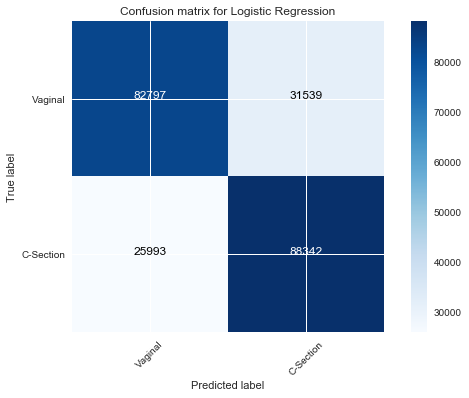

In [36]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_LR_test)

# Set binary target as 'Vaginal' and 'C-Section'
target=np.array(['Vaginal', 'C-Section'])

# Plot confusion matrix for each classifier
plt.figure()
PlotConfusionMatrix(cnf_matrix, classes=target,
                      title='Confusion matrix for Logistic Regression')


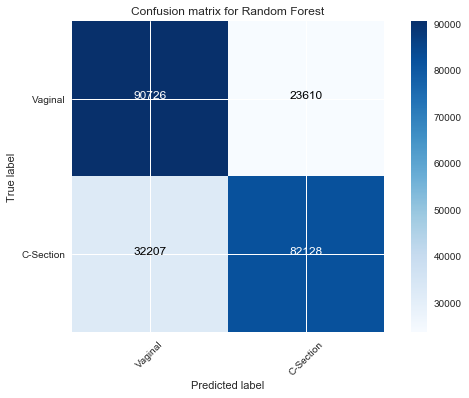

In [37]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_RF_test)

# Set binary target as 'Vaginal' and 'C-Section'
target=np.array(['Vaginal', 'C-Section'])

# Plot confusion matrix for each classifier
plt.figure()
PlotConfusionMatrix(cnf_matrix, classes=target,
                      title='Confusion matrix for Random Forest')

In [25]:
# Import 'GridSearchCV'
from sklearn.grid_search import GridSearchCV

# Create the parameters list you wish to tune
parameters = {'n_estimators':[25, 30, 35, 40, 45, 50, 55], 'max_depth':[50, 60, 70]}

# Initialize the classifier
clf=RandomForestClassifier(random_state=42)
# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

y_pred = clf.fit(X_train, y_train).predict(X_test)

# Make an f1 scoring function using 'f1_score' 
f1_tune_test = f1_score(y_test, y_pred)


# Report the final F1 score testing after parameter tuning
print "Tuned model has a testing F1 score of {:.2f}.".format(f1_tune_test)
print("Best parameters set found on development set:")
print
print(grid_obj.best_estimator_)

/Users/sabrinaaliyeva/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sabrinaaliyeva/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Tuned model has a testing F1 score of 0.77675695.
Best parameters set found on development set:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=55, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


In [39]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=50,n_estimators=45, random_state=42)
start_rf = time()

y_pred = clf.fit(X_train, y_train).predict(X_test)
f1_rf_test = f1_score(y_test, y_pred)

end_rf=time()

y_pred_proba = clf.fit(X_train, y_train).predict_proba(X_test)

print "Made predictions in {:.2f} seconds".format(end_rf - start_rf)
print "F1 score for test set: {:.2f}.".format(f1_rf_test)

Made predictions in 192.91 seconds
F1 score for test set: 0.78.


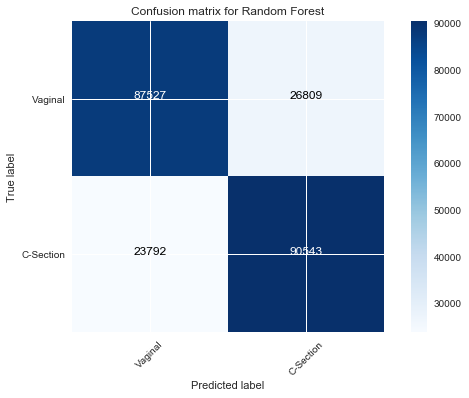

In [40]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

# Set binary target as 'Vaginal' and 'C-Section'
target=np.array(['Vaginal', 'C-Section'])

# Plot confusion matrix for each classifier
plt.figure()
PlotConfusionMatrix(cnf_matrix, classes=target,
                      title='Confusion matrix for Random Forest')

** Logistic Regression (LR) & Random Forest (RF) & Random Forest Tuned (RFT)**  

| Classifer | Training Time & Prediction Time (test) | F1 Score (test)  |
| :-------- | :------------------------------------: | :--------------: | 
| LR        |                130.57                  |      0.74        | 
| RF        |                51.96                   |      0.76        | 
| RFT       |                192.91                  |      0.78        |    


Feature ranking:
1. feature 27 (0.055086)
2. feature 26 (0.045783)
3. feature 37 (0.043893)
4. feature 24 (0.038340)
5. feature 15 (0.038228)
6. feature 19 (0.036914)
7. feature 41 (0.028991)
8. feature 42 (0.028105)
9. feature 10 (0.027237)
10. feature 28 (0.027180)
11. feature 13 (0.026625)
12. feature 7 (0.026408)
13. feature 1 (0.025779)
14. feature 6 (0.025133)
15. feature 17 (0.021319)
16. feature 25 (0.018148)
17. feature 14 (0.016999)
18. feature 150 (0.016993)
19. feature 117 (0.016087)
20. feature 34 (0.015027)
21. feature 8 (0.012923)
22. feature 38 (0.012902)
23. feature 119 (0.012799)
24. feature 4 (0.012737)
25. feature 3 (0.012566)
26. feature 9 (0.012487)
27. feature 18 (0.012107)
28. feature 52 (0.011942)
29. feature 30 (0.011911)
30. feature 158 (0.011550)
31. feature 39 (0.010974)
32. feature 156 (0.010709)
33. feature 16 (0.009990)
34. feature 12 (0.009880)
35. feature 152 (0.009538)
36. feature 31 (0.008394)
37. feature 2 (0.008319)
38. feature 51 (0.007795)
39. fe

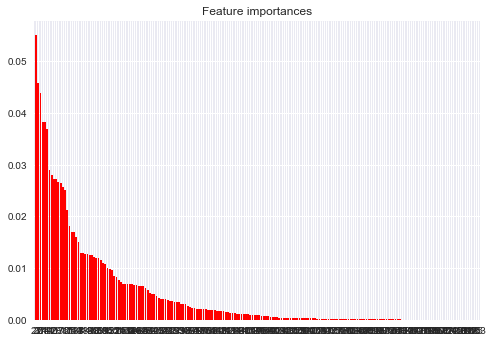

In [41]:
# Display important features in descending order

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()


In [43]:
important_indices = indices[:30]
important_features = X_all.columns[important_indices]
print("First 30 Important Feature :")
print (important_features)

First 30 Important Feature :
Index([u'dwgt_r', u'pwgt_r', u'attend', u'm_ht_in', u'illb_r11', u'previs_rec', u'gestrec10', u'oegest_r10', u'priorlive', u'wtgain_rec', u'lbo_rec', u'fagerec11', u'mager9', u'meduc', u'ilp_r11', u'bmi_r', u'tbo_rec', u'ld_antb_N', u'rf_cesar_N', u'me_pres', u'frace15', u'pay_rec', u'rf_cesar_Y', u'mhisp_r', u'mrace15', u'fhisp_r', u'precare5', u'uld_breech', u'rf_cesarn', u'ld_anes_Y'], dtype='object')


In [46]:
# Display probabilities of predicted classes

y_pred_proba.tolist()
labels=['Vaginal (1)', 'C-Section (2)']
df_proba=pd.DataFrame(y_pred_proba, columns=labels)
df_y_pred=pd.DataFrame({'Predicted': y_pred})
df_y_true=pd.DataFrame({'True': y_test})
data_proba=pd.concat([df_proba, df_y_pred, df_y_true], axis=1)
data_proba.tail(10)



,Vaginal (1),C-Section (2),Predicted,True
228661,0.022222,0.977778,2,2
228662,0.155556,0.844444,2,2
228663,0.155556,0.844444,2,2
228664,0.377778,0.622222,2,1
228665,0.111111,0.888889,2,2
228666,0.266667,0.733333,2,2
228667,0.731034,0.268966,1,1
228668,0.600000,0.400000,1,1
228669,0.311111,0.688889,2,2
228670,0.155556,0.844444,2,2
